# Prospect Hotel Booking Cancellation

## Import Reqired Libraries

In [1]:
import pandas as pd # for Data Frame
import numpy as np # for Mathemetical Operation
import matplotlib.pyplot as plt # for Visulization
%matplotlib inline
import seaborn as sns # for Visulization
import warnings # for Ignore Warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier # for Random Forest Algoritham
from sklearn.model_selection import train_test_split # fro Split data into Train and Test Dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler # for Encoding Categorical Data and Scling Data
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix # for Accuracy

## Part - 1 : Data Exploration and Pre-processing

### 1) Load the given dataset

In [2]:
df = pd.read_csv('Prospect Hotel Booking Cancellation.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [3]:
df.shape

(119390, 32)

### 2) Print the unique values in all columns

In [4]:
for col in df.columns:
    print(col, df[col].unique())

hotel ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
lead_time [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

### Check null values in dataset

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### 3) Fill nan values in country with 'other'

In [6]:
df['country'] = df['country'].fillna('other')
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'other', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA'

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### 4) Fill nan values in agent with mean of agent columns

In [8]:
df['agent'] = df['agent'].replace(np.nan, df['agent'].mean())
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

### 5) Fill nan values in company with mean of company columns

In [9]:
df['company'] = df['company'].replace(np.nan, df['company'].mean())
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### 6) Drop all the remaining null values

In [10]:
df = df.dropna()
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### 6) Plot the count of adult and children with help of bar plot

<AxesSubplot:>

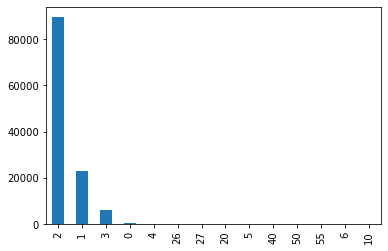

In [11]:
df['adults'].value_counts().plot(kind = 'bar')


<AxesSubplot:>

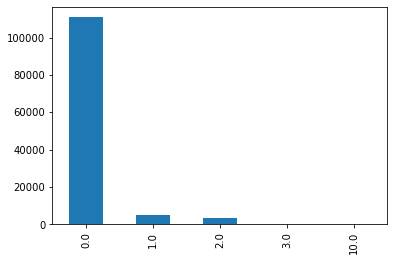

In [12]:
df['children'].value_counts().plot(kind = 'bar')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

In [14]:
df = df.drop('reservation_status_date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

In [15]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### 7) Perform Lable Encoding on categorical data

In [16]:
enc = LabelEncoder()

In [17]:
df['hotel'] = enc.fit_transform(df['hotel'])
df['arrival_date_month'] = enc.fit_transform(df['arrival_date_month'])
df['meal'] = enc.fit_transform(df['meal'])
df['country'] = enc.fit_transform(df['country'])
df['market_segment'] = enc.fit_transform(df['market_segment'])
df['distribution_channel'] = enc.fit_transform(df['distribution_channel'])
df['reserved_room_type'] = enc.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = enc.fit_transform(df['assigned_room_type'])
df['deposit_type'] = enc.fit_transform(df['deposit_type'])
df['customer_type'] = enc.fit_transform(df['customer_type'])
df['reservation_status'] = enc.fit_transform(df['reservation_status'])

In [18]:
df.dtypes

hotel                               int32
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int32
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int32
country                             int32
market_segment                      int32
distribution_channel                int32
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int32
assigned_room_type                  int32
booking_changes                     int64
deposit_type                        int32
agent                             

## Part - 2 : Model Building

### 1) Create feature and target data

In [19]:
x = df.drop('is_canceled', axis=1)
y = df[['is_canceled']]

In [20]:
x.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,342,2015,5,27,1,0,0,2,0.0,...,3,0,86.693382,189.266735,0,2,0.0,0,0,1
1,1,737,2015,5,27,1,0,0,2,0.0,...,4,0,86.693382,189.266735,0,2,0.0,0,0,1
2,1,7,2015,5,27,1,0,1,1,0.0,...,0,0,86.693382,189.266735,0,2,75.0,0,0,1
3,1,13,2015,5,27,1,0,1,1,0.0,...,0,0,304.000000,189.266735,0,2,75.0,0,0,1
4,1,14,2015,5,27,1,0,2,2,0.0,...,0,0,240.000000,189.266735,0,2,98.0,0,1,1


In [21]:
y.head()

,is_canceled
0,0
1,0
2,0
3,0
4,0


In [22]:
x.shape

(119386, 30)

### 2) Split Data into training and testing

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [24]:
x_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
55329,0,398,2016,1,33,11,0,1,1,0.0,...,0,1,1.000000,189.266735,0,2,59.00,0,0,0
105111,0,80,2017,4,4,27,1,2,2,0.0,...,0,0,7.000000,189.266735,0,2,72.07,0,1,1
41845,0,50,2015,1,35,25,0,4,2,0.0,...,0,0,1.000000,189.266735,0,3,62.00,0,0,0
30506,1,0,2016,9,48,24,0,1,1,0.0,...,0,0,86.693382,189.266735,0,2,55.00,0,0,1
3495,1,93,2015,2,51,19,0,1,2,0.0,...,0,1,86.693382,189.266735,0,2,80.00,0,0,0


In [25]:
x_train.shape

(95508, 30)

In [26]:
x_test.shape

(23878, 30)

In [27]:
y_train.shape

(95508, 1)

In [28]:
y_test.shape

(23878, 1)

### Feature Selection

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
model = ExtraTreesClassifier()

In [31]:
model.fit(x,y)

ExtraTreesClassifier()

In [32]:
feat_importance = pd.Series(model.feature_importances_, index=x.columns)

<AxesSubplot:>

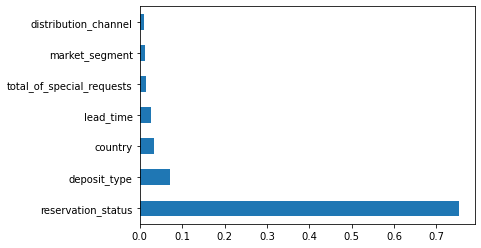

In [33]:
feat_importance.nlargest(7).plot(kind = 'barh')

In [34]:
feat_importance.nlargest(7)

reservation_status           0.752476
deposit_type                 0.072094
country                      0.033001
lead_time                    0.026827
total_of_special_requests    0.014517
market_segment               0.011053
distribution_channel         0.010516
dtype: float64

In [35]:
x_top7 = x[['reservation_status', 'deposit_type', 'country', 'lead_time', 'total_of_special_requests', 'distribution_channel', 'market_segment']]

### 3) Apply Random Forest Classifier on data

In [36]:
rf = RandomForestClassifier(n_estimators=40,
                            max_depth=10,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_features='sqrt',
                            random_state=40)

In [37]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=40,
                       random_state=40)

### Training Score

In [38]:
training_score = round(rf.score(x_train, y_train)*100, 2)
print('Training Score : ', training_score)

Training Score :  99.94


### Testing Score

In [39]:
testing_score = round(rf.score(x_test, y_test)*100, 2)
print('Testing Score : ', testing_score)

Testing Score :  99.92


### 4) Create function which show Precision Score, Recall Score, Accuracy, Classification Report and Confusion Matrix

In [40]:
def run_model(rf, x_train, y_train, x_test, y_test):
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
    precision = round(precision_score(y_test, y_pred)*100, 2)
    recall = round(recall_score(y_test, y_pred)*100, 2)
    print('Accuracy Score : ', accuracy)
    print('Precision Score : ', precision)
    print('Recall Score : ', recall)
    print('Classification Report : \n\n', classification_report(y_test, y_pred, digits=5))
    print('Confusion Matrix : \n\n', confusion_matrix(y_test, y_pred))

In [41]:
run_model(rf, x_train, y_train, x_test, y_test)

Accuracy Score :  99.92
Precision Score :  100.0
Recall Score :  99.78
Classification Report : 

               precision    recall  f1-score   support

           0    0.99866   1.00000   0.99933     14949
           1    1.00000   0.99776   0.99888      8929

    accuracy                        0.99916     23878
   macro avg    0.99933   0.99888   0.99911     23878
weighted avg    0.99916   0.99916   0.99916     23878

Confusion Matrix : 

 [[14949     0]
 [   20  8909]]
